# 03_Modeling

This notebook is where the models will be designed and evaluated. I am using random_state=42 for Random Search CV to keep everything consistant throughout this notebook. Additionally, I will not be using 'None' for stop_words because it will always outperform everything else due to 'til' (the giveaway that the post is from r/todayilearned) is included. Thus the stop_word options will be \['til'\] or stopwords_amended so that 'til' is for sure removed from the model. The model that performs the best will be exported to the final notebook and expanded on. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import FunctionTransformer

pd.options.display.max_colwidth = 400

In [2]:
df = pd.read_csv('../data/cleaned/prepped_posts.csv', na_filter=False)
# Setting na_filter to False since I know that there are no NaNs and I want to keep my empty cells as blank strings.

In [3]:
df.head()

,title,selftext,subreddit,created_utc,all_text
0,Germany Aims To Get 100% of Energy From Renewable Sources By 2035,,1,1646141490,Germany Aims To Get 100% of Energy From Renewable Sources By 2035
1,Ambiental Dedetização - Dedetizadora e controle de Pragas,,1,1646140604,Ambiental Dedetização - Dedetizadora e controle de Pragas
2,"Alcohol use by parents of young children was related to how many bars and restaurants were near where they shopped, where they worked and where their children went to school, a new study finds.",,1,1646138910,"Alcohol use by parents of young children was related to how many bars and restaurants were near where they shopped, where they worked and where their children went to school, a new study finds."
3,Neighbourhoods Play A Role In Health Of Adults. Results confirm previous findings but now also show a clear link between living environments and physical and mental health. He believes they should help inform city planning policy and decision-making.,,1,1646132676,Neighbourhoods Play A Role In Health Of Adults. Results confirm previous findings but now also show a clear link between living environments and physical and mental health. He believes they should help inform city planning policy and decision-making.
4,Ultrasound scan can diagnose prostate cancer. The ultrasound scans missed only 4.3 per cent more clinically important prostate cancer cases – cancer that should be treated rather than monitored – compared to magnetic resonance imaging (MRI) scans currently used to detect prostate cancer,,1,1646132446,Ultrasound scan can diagnose prostate cancer. The ultrasound scans missed only 4.3 per cent more clinically important prostate cancer cases – cancer that should be treated rather than monitored – compared to magnetic resonance imaging (MRI) scans currently used to detect prostate cancer


In [4]:
X = df['all_text']
y = df['subreddit']

In [5]:
stopwords_amended = list(CountVectorizer(stop_words = 'english').get_stop_words())
stopwords_amended.append('til')

Since my API did not grab exactly 1500 posts for each for some reason, there is a slight difference in the baseline model. It will register everything as a post from r/science. As such, I am going to stratify the data.

In [6]:
y.value_counts(normalize=True)

1    0.500501
0    0.499499
Name: subreddit, dtype: float64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

## KNN Pipeline

In this section, I will be running a pipeline containing K Nearest Neighbors. This model will try to classify the post based on it's closest neighbors. While not the best model overall, it does work well for establishing a basic model that I can tinker with. I believe I can get the model to be around 70% accurate with the right balance of parameters. 

I will be running the pipeline with both Count Vectorizer and Term Frequency-Inverse Document Frequency Vectorizer. I will also be running the models with a RandomizedSearchCV and a GridSearchCV once I have narrowed down the options for parameters.

### CountVectorizer Version

In [8]:
pipe_knn_c = Pipeline([
    ('vect', CountVectorizer()),
    ('knn', KNeighborsClassifier())
])

#### RandomizedSearch CV

In [9]:
params_knn_c = {
    'vect__stop_words': [['til'], stopwords_amended],
    'vect__min_df': range(1, 11, 2),
    'vect__max_df': [1.0, .75, .5, .25],
    'vect__binary': [True, False],
    'vect__ngram_range': [(1,1), (1,2)],
    'knn__n_neighbors': [3, 5, 7, 10],
    'knn__weights': ['uniform', 'distance'],
    
}

rs_knn_c = RandomizedSearchCV(pipe_knn_c, param_distributions=params_knn_c, n_iter=50, random_state=42)
rs_knn_c.fit(X_train, y=y_train)

print('Best Training CV Score: ', rs_knn_c.best_score_)
print('Best Test CV Score: ', rs_knn_c.score(X_test, y_test))
print('Best Parameters: ', rs_knn_c.best_params_)

Best Training CV Score:  0.7441069042316258
Best Test CV Score:  0.732
Best Parameters:  {'vect__stop_words': ['ten', 'each', 'get', 'herself', 'much', 'you', 'everyone', 'my', 'ours', 'interest', 'sometimes', 'hereafter', 'least', 'beforehand', 'call', 'should', 'yours', 'besides', 'off', 'those', 'this', 'bottom', 'whatever', 'thru', 'hereupon', 'always', 'our', 'we', 'might', 'behind', 'itself', 'a', 'whole', 'due', 'above', 'name', 'de', 'system', 'so', 'until', 'thereby', 'empty', 'while', 'him', 'as', 'she', 'whenever', 'see', 'all', 'few', 'could', 'three', 'for', 'with', 'your', 'somewhere', 'among', 'mostly', 'because', 'before', 'nine', 'whose', 'when', 'but', 'eleven', 'most', 'seeming', 'here', 'some', 'twenty', 'may', 'sixty', 'am', 'whereafter', 'into', 'somehow', 'five', 'already', 'hence', 'whoever', 'myself', 'part', 'his', 'another', 'give', 'back', 'almost', 'towards', 'forty', 'they', 'seem', 'also', 'would', 'first', 'cannot', 'yet', 'are', 'therein', 'their', 'noo

In [10]:
pd.DataFrame(rs_knn_c.cv_results_)[['mean_test_score', 'params']]

,mean_test_score,params
0,0.644403,"{'vect__stop_words': ['til'], 'vect__ngram_range': (1, 1), 'vect__min_df': 1, 'vect__max_df': 0.5, 'vect__binary': False, 'knn__weights': 'distance', 'knn__n_neighbors': 10}"
1,0.692466,"{'vect__stop_words': ['ten', 'each', 'get', 'herself', 'much', 'you', 'everyone', 'my', 'ours', 'interest', 'sometimes', 'hereafter', 'least', 'beforehand', 'call', 'should', 'yours', 'besides', 'off', 'those', 'this', 'bottom', 'whatever', 'thru', 'hereupon', 'always', 'our', 'we', 'might', 'behind', 'itself', 'a', 'whole', 'due', 'above', 'name', 'de', 'system', 'so', 'until', 'thereby', 'em..."
2,0.737874,"{'vect__stop_words': ['ten', 'each', 'get', 'herself', 'much', 'you', 'everyone', 'my', 'ours', 'interest', 'sometimes', 'hereafter', 'least', 'beforehand', 'call', 'should', 'yours', 'besides', 'off', 'those', 'this', 'bottom', 'whatever', 'thru', 'hereupon', 'always', 'our', 'we', 'might', 'behind', 'itself', 'a', 'whole', 'due', 'above', 'name', 'de', 'system', 'so', 'until', 'thereby', 'em..."
3,0.619499,"{'vect__stop_words': ['til'], 'vect__ngram_range': (1, 2), 'vect__min_df': 5, 'vect__max_df': 0.5, 'vect__binary': False, 'knn__weights': 'uniform', 'knn__n_neighbors': 7}"
4,0.564741,"{'vect__stop_words': ['ten', 'each', 'get', 'herself', 'much', 'you', 'everyone', 'my', 'ours', 'interest', 'sometimes', 'hereafter', 'least', 'beforehand', 'call', 'should', 'yours', 'besides', 'off', 'those', 'this', 'bottom', 'whatever', 'thru', 'hereupon', 'always', 'our', 'we', 'might', 'behind', 'itself', 'a', 'whole', 'due', 'above', 'name', 'de', 'system', 'so', 'until', 'thereby', 'em..."
5,0.580313,"{'vect__stop_words': ['til'], 'vect__ngram_range': (1, 2), 'vect__min_df': 3, 'vect__max_df': 0.75, 'vect__binary': True, 'knn__weights': 'uniform', 'knn__n_neighbors': 5}"
6,0.744107,"{'vect__stop_words': ['ten', 'each', 'get', 'herself', 'much', 'you', 'everyone', 'my', 'ours', 'interest', 'sometimes', 'hereafter', 'least', 'beforehand', 'call', 'should', 'yours', 'besides', 'off', 'those', 'this', 'bottom', 'whatever', 'thru', 'hereupon', 'always', 'our', 'we', 'might', 'behind', 'itself', 'a', 'whole', 'due', 'above', 'name', 'de', 'system', 'so', 'until', 'thereby', 'em..."
7,0.640416,"{'vect__stop_words': ['til'], 'vect__ngram_range': (1, 1), 'vect__min_df': 3, 'vect__max_df': 0.25, 'vect__binary': False, 'knn__weights': 'uniform', 'knn__n_neighbors': 5}"
8,0.628845,"{'vect__stop_words': ['ten', 'each', 'get', 'herself', 'much', 'you', 'everyone', 'my', 'ours', 'interest', 'sometimes', 'hereafter', 'least', 'beforehand', 'call', 'should', 'yours', 'besides', 'off', 'those', 'this', 'bottom', 'whatever', 'thru', 'hereupon', 'always', 'our', 'we', 'might', 'behind', 'itself', 'a', 'whole', 'due', 'above', 'name', 'de', 'system', 'so', 'until', 'thereby', 'em..."
9,0.567412,"{'vect__stop_words': ['til'], 'vect__ngram_range': (1, 2), 'vect__min_df': 3, 'vect__max_df': 0.75, 'vect__binary': True, 'knn__weights': 'uniform', 'knn__n_neighbors': 10}"


In [11]:
print(classification_report(y_test, rs_knn_c.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.90      0.77       375
           1       0.85      0.57      0.68       375

    accuracy                           0.73       750
   macro avg       0.76      0.73      0.72       750
weighted avg       0.76      0.73      0.72       750



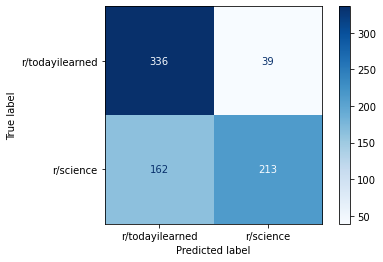

In [12]:
plot_confusion_matrix(rs_knn_c, X_test, y_test,
                      display_labels=['r/todayilearned', 'r/science'], cmap='Blues');

This wasn't too bad. Without having 'til' to rely on, the model is performing about as well as I thought it would for KNN. Getting the posts correct 2 out of 3 times is a pretty good start. I am going to run a gridsearch below with narrower parameters to see if there is any difference.

#### GridSearchCV

In [13]:
params_knn_c = {
    'vect__stop_words': [['til'], stopwords_amended],
    'vect__min_df': range(1, 11, 2),
    'vect__max_df': [1.0, .75, .5],
    'vect__binary': [True, False],
    'vect__ngram_range': [(1,1), (1,2)],
    'knn__n_neighbors': [3, 5, 7, 10],
    'knn__weights': ['distance']
}

gs_knn_c = GridSearchCV(pipe_knn_c, param_grid=params_knn_c)
gs_knn_c.fit(X_train, y_train)

print('Best Training CV Score: ', gs_knn_c.best_score_)
print('Best Test CV Score: ', gs_knn_c.score(X_test, y_test))
print('Best Parameters: ', gs_knn_c.best_params_)

Best Training CV Score:  0.745879732739421
Best Test CV Score:  0.7093333333333334
Best Parameters:  {'knn__n_neighbors': 5, 'knn__weights': 'distance', 'vect__binary': True, 'vect__max_df': 1.0, 'vect__min_df': 9, 'vect__ngram_range': (1, 2), 'vect__stop_words': ['ten', 'each', 'get', 'herself', 'much', 'you', 'everyone', 'my', 'ours', 'interest', 'sometimes', 'hereafter', 'least', 'beforehand', 'call', 'should', 'yours', 'besides', 'off', 'those', 'this', 'bottom', 'whatever', 'thru', 'hereupon', 'always', 'our', 'we', 'might', 'behind', 'itself', 'a', 'whole', 'due', 'above', 'name', 'de', 'system', 'so', 'until', 'thereby', 'empty', 'while', 'him', 'as', 'she', 'whenever', 'see', 'all', 'few', 'could', 'three', 'for', 'with', 'your', 'somewhere', 'among', 'mostly', 'because', 'before', 'nine', 'whose', 'when', 'but', 'eleven', 'most', 'seeming', 'here', 'some', 'twenty', 'may', 'sixty', 'am', 'whereafter', 'into', 'somehow', 'five', 'already', 'hence', 'whoever', 'myself', 'part', 

In [14]:
print(classification_report(y_test, gs_knn_c.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72       375
           1       0.72      0.69      0.70       375

    accuracy                           0.71       750
   macro avg       0.71      0.71      0.71       750
weighted avg       0.71      0.71      0.71       750



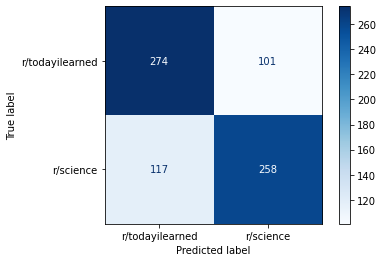

In [15]:
plot_confusion_matrix(gs_knn_c, X_test, y_test,
                      display_labels=['r/todayilearned', 'r/science'], cmap='Blues');

In [16]:
print('Best Random Search CV Training Score: ', rs_knn_c.best_score_)
print('Best Random Search CV Test Score: ', rs_knn_c.score(X_test, y_test))
print('Best Grid Search CV Training Score: ', gs_knn_c.best_score_)
print('Best Grid Search CV Test Score: ', gs_knn_c.score(X_test, y_test))

Best Random Search CV Training Score:  0.7441069042316258
Best Random Search CV Test Score:  0.732
Best Grid Search CV Training Score:  0.745879732739421
Best Grid Search CV Test Score:  0.7093333333333334


The overall accuracy was pretty similar between grid search and random search. The big difference came with the recall and precision scores. Random search had very different scores while grid search's were basically the same.


However, for this project we really only care about the accuracy score, which is fairly close between the two searchers. Therefore, I am going to just use RandomizedSearchedCV going forward to save time and perform more iterations on the models. There was also a little less variance between the training and test scores. 

### TfidfVectorizer Version

In [17]:
pipe_knn_t = Pipeline([
    ('vect', TfidfVectorizer()),
    ('knn', KNeighborsClassifier())
])

In [18]:
params_knn_t = {
    'vect__stop_words': [['til'], stopwords_amended],
    'vect__min_df': range(1, 11, 2),
    'vect__max_df': [1.0, .75, .5, .25],
    'vect__binary': [True, False],
    'vect__ngram_range': [(1,1), (1,2)],
    'knn__n_neighbors': [3, 5, 7, 10],
    'knn__weights': ['uniform', 'distance'],
    
}

rs_knn_t = RandomizedSearchCV(pipe_knn_t, param_distributions=params_knn_t, n_iter=50, random_state=42)
rs_knn_t.fit(X_train, y_train)

print('Best Training CV Score: ', rs_knn_t.best_score_)
print('Best Test CV Score: ', rs_knn_t.score(X_test, y_test))
print('Best Parameters: ', rs_knn_t.best_params_)

Best Training CV Score:  0.8175441722345955
Best Test CV Score:  0.816
Best Parameters:  {'vect__stop_words': ['til'], 'vect__ngram_range': (1, 1), 'vect__min_df': 1, 'vect__max_df': 0.5, 'vect__binary': False, 'knn__weights': 'distance', 'knn__n_neighbors': 10}


In [19]:
print(classification_report(y_test, rs_knn_t.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.93      0.83       375
           1       0.91      0.70      0.79       375

    accuracy                           0.82       750
   macro avg       0.83      0.82      0.81       750
weighted avg       0.83      0.82      0.81       750



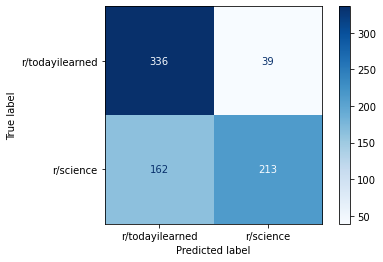

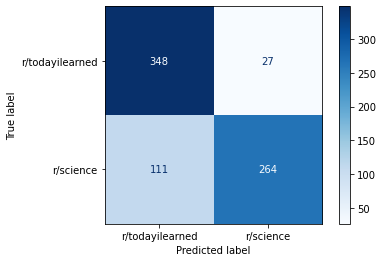

In [20]:
# 'CounterVectorizer'
plot_confusion_matrix(rs_knn_c, X_test, y_test,
                      display_labels=['r/todayilearned', 'r/science'], cmap='Blues')
# 'TF-IDF'
plot_confusion_matrix(rs_knn_t, X_test, y_test,
                      display_labels=['r/todayilearned', 'r/science'], cmap='Blues');

In [21]:
print('Best CountVectorizer Training Score: ', rs_knn_c.best_score_)
print('Best CountVectorizer Test Score: ', rs_knn_c.score(X_test, y_test))
print('Best TF-IDF Training Score: ', rs_knn_t.best_score_)
print('Best TF-IDF Test Score: ', rs_knn_t.score(X_test, y_test))

Best CountVectorizer Training Score:  0.7441069042316258
Best CountVectorizer Test Score:  0.732
Best TF-IDF Training Score:  0.8175441722345955
Best TF-IDF Test Score:  0.816


The TF-IDF model is better than Count Vectorizer model by 8% on the training data. The number of false negatives is greatly reduced by 51 and the false positives is reduced by 12. So far this is my best model. 

## LogisticRegression Pipeline

This model is going to use Logistic Regression in the pipeline. I believe this model will perform better because it is assigning coefficients to the features and using those to decide the best classification instead of relying on the closest posts.

I will be running the pipeline with both Count Vectorizer and Term Frequency-Inverse Document Frequency Vectorizer. I am only using the RandomizedSearchCV for this section. 

In [22]:
pipe_logreg_c = Pipeline([
    ('vect', CountVectorizer()),
    ('logreg', LogisticRegression(max_iter=10_000))
])

### CountVectorizer Version

In [23]:
params_logreg_c = {
    'vect__stop_words': [['til'], stopwords_amended],
    'vect__min_df': range(1, 11, 2),
    'vect__max_df': [1.0, .75, .5],
    'vect__binary': [True, False],
    'vect__ngram_range': [(1,1), (1,2)],
    'logreg__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'logreg__solver': ['lbfgs', 'liblinear', 'saga']
}

logreg_c = RandomizedSearchCV(pipe_logreg_c, param_distributions=params_logreg_c, n_iter=50, random_state=42)
logreg_c.fit(X_train, y_train)

C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=l

C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=l

C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=l

C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

RandomizedSearchCV(estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                             ('logreg',
                                              LogisticRegression(max_iter=10000))]),
                   n_iter=50,
                   param_distributions={'logreg__penalty': ['l1', 'l2',
                                                            'elasticnet',
                                                            'none'],
                                        'logreg__solver': ['lbfgs', 'liblinear',
                                                           'saga'],
                                        'vect__binary': [True, False],
                                        'vect__max_df': [1.0, 0.75, 0.5],
                                        'vect__min_df': range(1, 11, 2),
                                        'vect__ngram_range': [(1, 1), (1, 2)],
                                        'vect__stop_words': [['til'],
                        

In [24]:
print('Best Training CV Score: ', logreg_c.best_score_)
print('Best Test CV Score: ', logreg_c.score(X_test, y_test))
print('Best Parameters: ', logreg_c.best_params_)

Best Training CV Score:  0.8647186340014847
Best Test CV Score:  0.8653333333333333
Best Parameters:  {'vect__stop_words': ['til'], 'vect__ngram_range': (1, 1), 'vect__min_df': 1, 'vect__max_df': 0.75, 'vect__binary': True, 'logreg__solver': 'saga', 'logreg__penalty': 'l2'}


In [25]:
print(classification_report(y_test, logreg_c.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       375
           1       0.86      0.87      0.87       375

    accuracy                           0.87       750
   macro avg       0.87      0.87      0.87       750
weighted avg       0.87      0.87      0.87       750



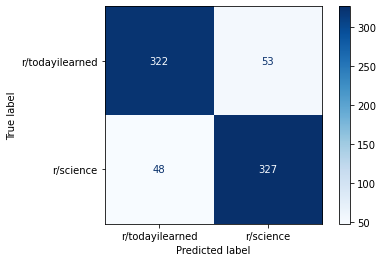

In [26]:
plot_confusion_matrix(logreg_c, X_test, y_test,
                      display_labels=['r/todayilearned', 'r/science'], cmap='Blues');

In [27]:
print('Best TF-IDF KNN Training Score: ', rs_knn_t.best_score_)
print('Best TF-IDF KNN Test Score: ', rs_knn_t.score(X_test, y_test))
print('Best CountVector LogReg Training Score: ', logreg_c.best_score_)
print('Best CountVector LogReg Test Score: ', logreg_c.score(X_test, y_test))

Best TF-IDF KNN Training Score:  0.8175441722345955
Best TF-IDF KNN Test Score:  0.816
Best CountVector LogReg Training Score:  0.8647186340014847
Best CountVector LogReg Test Score:  0.8653333333333333


The Logistic Regression model is 5% more accurate, and the false positives and false negatives have evened out. Being 86.7% accurate is pretty good overall. 

### TfidfVectorizer Version

In [28]:
pipe_logreg_t = Pipeline([
    ('vect', TfidfVectorizer()),
    ('logreg', LogisticRegression(max_iter=10_000))
])

In [29]:
params_logreg_t = {
    'vect__stop_words': [['til'], stopwords_amended],
    'vect__min_df': range(1, 11, 2),
    'vect__max_df': [1.0, .75, .5],
    'vect__binary': [True, False],
    'vect__ngram_range': [(1,1), (1,2)],
    'logreg__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'logreg__solver': ['lbfgs', 'liblinear', 'saga']
}

logreg_t = RandomizedSearchCV(pipe_logreg_t, param_distributions=params_logreg_t, n_iter=50, random_state=42)
logreg_t.fit(X_train, y_train)

C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=l

C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=l

C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=l

C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\tpric\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got 

RandomizedSearchCV(estimator=Pipeline(steps=[('vect', TfidfVectorizer()),
                                             ('logreg',
                                              LogisticRegression(max_iter=10000))]),
                   n_iter=50,
                   param_distributions={'logreg__penalty': ['l1', 'l2',
                                                            'elasticnet',
                                                            'none'],
                                        'logreg__solver': ['lbfgs', 'liblinear',
                                                           'saga'],
                                        'vect__binary': [True, False],
                                        'vect__max_df': [1.0, 0.75, 0.5],
                                        'vect__min_df': range(1, 11, 2),
                                        'vect__ngram_range': [(1, 1), (1, 2)],
                                        'vect__stop_words': [['til'],
                        

In [30]:
print('Best Training CV Score: ', logreg_t.best_score_)
print('Best Test CV Score: ', logreg_t.score(X_test, y_test))
print('Best Parameters: ', logreg_t.best_params_)

Best Training CV Score:  0.8736124721603563
Best Test CV Score:  0.8813333333333333
Best Parameters:  {'vect__stop_words': ['til'], 'vect__ngram_range': (1, 2), 'vect__min_df': 1, 'vect__max_df': 0.5, 'vect__binary': False, 'logreg__solver': 'saga', 'logreg__penalty': 'none'}


In [31]:
print(classification_report(y_test, logreg_t.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       375
           1       0.90      0.86      0.88       375

    accuracy                           0.88       750
   macro avg       0.88      0.88      0.88       750
weighted avg       0.88      0.88      0.88       750



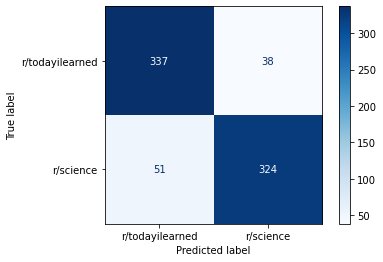

In [32]:
plot_confusion_matrix(logreg_t, X_test, y_test,
                      display_labels=['r/todayilearned', 'r/science'], cmap='Blues');

In [33]:
print('Best CountVector LogReg Training Score: ', logreg_c.best_score_)
print('Best CountVector LogReg Test Score: ', logreg_c.score(X_test, y_test))
print('Best TF-IDF LogReg Training Score: ', logreg_t.best_score_)
print('Best TF-IDF LogReg Test Score: ', logreg_t.score(X_test, y_test))

Best CountVector LogReg Training Score:  0.8647186340014847
Best CountVector LogReg Test Score:  0.8653333333333333
Best TF-IDF LogReg Training Score:  0.8736124721603563
Best TF-IDF LogReg Test Score:  0.8813333333333333


The TF-IDF Logistic Regression model is a couple of percentage points better, making this the best model. 

## Best KNN and Logreg Models with Word Count Included

I am going to use feature union and combine word count with the best KNN and Logreg models and see if adding in word count can help make the models more accurate. I am only using the best metrics for each since the word count is going to be run independently of the TF-IDF models. Jack Rayner helped me get this up and running.

In [34]:
df_2 = pd.read_csv('../data/cleaned/prepped_posts_with_count.csv', na_filter=False)
df_2.head()

,title,selftext,subreddit,created_utc,all_text,word_count
0,Germany Aims To Get 100% of Energy From Renewable Sources By 2035,,1,1646141490,Germany Aims To Get 100% of Energy From Renewable Sources By 2035,12
1,Ambiental Dedetização - Dedetizadora e controle de Pragas,,1,1646140604,Ambiental Dedetização - Dedetizadora e controle de Pragas,8
2,"Alcohol use by parents of young children was related to how many bars and restaurants were near where they shopped, where they worked and where their children went to school, a new study finds.",,1,1646138910,"Alcohol use by parents of young children was related to how many bars and restaurants were near where they shopped, where they worked and where their children went to school, a new study finds.",34
3,Neighbourhoods Play A Role In Health Of Adults. Results confirm previous findings but now also show a clear link between living environments and physical and mental health. He believes they should help inform city planning policy and decision-making.,,1,1646132676,Neighbourhoods Play A Role In Health Of Adults. Results confirm previous findings but now also show a clear link between living environments and physical and mental health. He believes they should help inform city planning policy and decision-making.,38
4,Ultrasound scan can diagnose prostate cancer. The ultrasound scans missed only 4.3 per cent more clinically important prostate cancer cases – cancer that should be treated rather than monitored – compared to magnetic resonance imaging (MRI) scans currently used to detect prostate cancer,,1,1646132446,Ultrasound scan can diagnose prostate cancer. The ultrasound scans missed only 4.3 per cent more clinically important prostate cancer cases – cancer that should be treated rather than monitored – compared to magnetic resonance imaging (MRI) scans currently used to detect prostate cancer,43


In [35]:
X_2 = df_2.drop(columns='subreddit')
y_2 = df_2['subreddit']

In [36]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, random_state=42, stratify=y_2)

In [37]:
# From lesson-missing-data starter-code
def get_word_count_col(df):
    return df[['word_count']]

get_word_count_col_tf = FunctionTransformer(get_word_count_col, validate=False)

In [38]:
def get_all_text_col(df):
    return df['all_text']

get_all_text_col_tf = FunctionTransformer(get_all_text_col, validate=False)

In [39]:
word_count_pipe = Pipeline([
    ('word_count', get_word_count_col_tf),
])

all_text_pipe = Pipeline([
    ('all_text', get_all_text_col_tf),
    ('vect', TfidfVectorizer()),
])

In [40]:
feature_union = FeatureUnion([
    ('count', word_count_pipe),
    ('text', all_text_pipe),
])

### KNN

In [41]:
knn_pipe = Pipeline([
    ('features', feature_union),
    ('knn', KNeighborsClassifier())
])

In [42]:
params={
    'features__text__vect__stop_words': [stopwords_amended],
    'features__text__vect__min_df':[9],
    'features__text__vect__max_df': [.25],
    'features__text__vect__binary': [True],
    'features__text__vect__ngram_range': [(1,2)],
    'knn__weights': ['distance'],
    'knn__n_neighbors': [3]
}
knn_final = RandomizedSearchCV(knn_pipe, param_distributions=params, random_state=42)
knn_final.fit(X_train_2, y_train_2)

print('Training Score: '+str(knn_final.best_score_))
print('Test Score: '+str(knn_final.score(X_test_2, y_test_2)))
print(classification_report(y_test, knn_final.predict(X_test_2)))

C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Training Score: 0.6471012125711457
Test Score: 0.608
              precision    recall  f1-score   support

           0       0.61      0.60      0.60       375
           1       0.61      0.62      0.61       375

    accuracy                           0.61       750
   macro avg       0.61      0.61      0.61       750
weighted avg       0.61      0.61      0.61       750



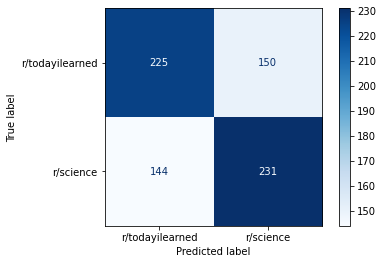

In [43]:
plot_confusion_matrix(knn_final, X_test_2, y_test_2,
                      display_labels=['r/todayilearned', 'r/science'], cmap='Blues');

The KNN model with word count really does not perform well. In fact, it is significantly worse than without the word count data. I will definitely not be using this model.

### Logreg

In [44]:
logreg_pipe = Pipeline([
    ('features', feature_union),
    ('logreg', LogisticRegression(max_iter=10_000))
])

In [45]:
params={
    'features__text__vect__stop_words': [['til']],
    'features__text__vect__min_df':[1],
    'features__text__vect__max_df': [.5],
    'features__text__vect__binary': [False],
    'features__text__vect__ngram_range': [(1,2)],
    'logreg__solver': ['saga'],
    'logreg__penalty': ['none']
}
logreg_final = RandomizedSearchCV(logreg_pipe, param_distributions=params, random_state=42)
logreg_final.fit(X_train_2, y_train_2)

print('Training Score: '+str(logreg_final.best_score_))
print('Test Score: '+str(logreg_final.score(X_test_2, y_test_2)))
print(classification_report(y_test_2, logreg_final.predict(X_test_2)))

C:\Users\tpric\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Training Score: 0.8780638455827765
Test Score: 0.8866666666666667
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       375
           1       0.87      0.91      0.89       375

    accuracy                           0.89       750
   macro avg       0.89      0.89      0.89       750
weighted avg       0.89      0.89      0.89       750



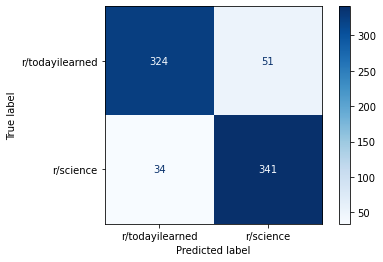

In [46]:
plot_confusion_matrix(logreg_final, X_test_2, y_test_2,
                      display_labels=['r/todayilearned', 'r/science'], cmap='Blues');

In [47]:
print('Best Model Training Score: ', logreg_t.best_score_)
print('Best Model Test Score: ', logreg_t.score(X_test, y_test))
print('With Word Count Training Score: '+str(logreg_final.best_score_))
print('With Word Count Test Score: '+str(logreg_final.score(X_test_2, y_test_2)))

Best Model Training Score:  0.8736124721603563
Best Model Test Score:  0.8813333333333333
With Word Count Training Score: 0.8780638455827765
With Word Count Test Score: 0.8866666666666667


This model with word count performs about the same on the test data as my previous best model, but does perform a little bit better. As such, including the word count does help the model and is now my best model.

# Next Steps

After running a couple of pipelines with different models, I have determined that my best model for predicting which subreddit a post came from is a Logistic Regression model with a solver of 'saga' and a logreg_penalty of 'none'. The best vectorizer was the Term Frequency-Inverse Document Frequency Vectorizer (TfidfVectorizer) with the following settings: stop_words of 'til', ngram_range of (1,2), min_df of 1, max_df of 0.5, and binary of False. I will be recreating that model and presenting my final thoughts in the 04_Best_Model_and_Final_Thoughts notebook.